In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_html('https://en.wikipedia.org/wiki/Demographics_of_India')[26]

In [3]:
df = df.iloc[:20]

In [4]:
df

,Age group,Male,Female,Total,Percentage (%),Cumulative Percentage
0,0–4,58632074,54174704,112806778,9.32,9.32
1,5–9,66300466,60627660,126928126,10.48,19.80
2,10–14,69418835,63290377,132709212,10.96,30.76
3,15–19,63982396,56544053,120526449,9.95,40.71
4,20–24,57584693,53839529,111424222,9.20,49.91
5,25–29,51344208,50069757,101413965,8.38,58.29
6,30–34,44660674,43934277,88594951,7.32,65.61
7,35–39,42919381,42221303,85140684,7.03,72.64
8,40–44,37545386,34892726,72438112,5.98,78.62
9,45–49,32138114,30180213,62318327,5.15,83.77


In [5]:
df['Age group'][1].split('–')

['5', '9']

In [6]:
age_pop_dist = []

for i in range(len(df)):
    
    start_age = int(df['Age group'][i].split('–')[0])
    end_age = int(df['Age group'][i].split('–')[1])
    
    population_in_age_group = int(df['Total'][i])/5
    
    while start_age<=end_age:
        
        age_pop_dist.append([start_age, population_in_age_group])
        
        start_age = start_age + 1    

In [7]:
age_pop_dist_df = pd.DataFrame(age_pop_dist)
age_pop_dist_df.columns = ['age', 'population']

In [8]:
age_pop_dist_df

,age,population
0,0,22561355.6
1,1,22561355.6
2,2,22561355.6
3,3,22561355.6
4,4,22561355.6
...,...,...
95,95,126659.4
96,96,126659.4
97,97,126659.4
98,98,126659.4


In [31]:
tfr = 2
no_of_years = 200
age_dist_list = [list(age_pop_dist_df['population'])]

In [32]:
for i in range(no_of_years):
    
    births = age_dist_list[-1][30]/2*tfr
    age_updated_list = [births] + age_dist_list[-1]
    age_updated_list = age_updated_list[:-1]
    age_dist_list.append(age_updated_list)

In [33]:
diff_years_age_dist = pd.DataFrame(age_dist_list).T.iloc[:86]

In [34]:
diff_years_age_dist.columns = [2011 + i for i in range(no_of_years+1)]

In [35]:
diff_years_age_dist

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,...,2202,2203,2204,2205,2206,2207,2208,2209,2210,2211
0,22561355.6,17718990.2,20282793.0,20282793.0,20282793.0,20282793.0,20282793.0,22284844.4,22284844.4,22284844.4,...,20282793.0,20282793.0,22284844.4,22284844.4,22284844.4,22284844.4,22284844.4,24105289.8,24105289.8,24105289.8
1,22561355.6,22561355.6,17718990.2,20282793.0,20282793.0,20282793.0,20282793.0,20282793.0,22284844.4,22284844.4,...,20282793.0,20282793.0,20282793.0,22284844.4,22284844.4,22284844.4,22284844.4,22284844.4,24105289.8,24105289.8
2,22561355.6,22561355.6,22561355.6,17718990.2,20282793.0,20282793.0,20282793.0,20282793.0,20282793.0,22284844.4,...,20282793.0,20282793.0,20282793.0,20282793.0,22284844.4,22284844.4,22284844.4,22284844.4,22284844.4,24105289.8
3,22561355.6,22561355.6,22561355.6,22561355.6,17718990.2,20282793.0,20282793.0,20282793.0,20282793.0,20282793.0,...,20282793.0,20282793.0,20282793.0,20282793.0,20282793.0,22284844.4,22284844.4,22284844.4,22284844.4,22284844.4
4,22561355.6,22561355.6,22561355.6,22561355.6,22561355.6,17718990.2,20282793.0,20282793.0,20282793.0,20282793.0,...,17718990.2,20282793.0,20282793.0,20282793.0,20282793.0,20282793.0,22284844.4,22284844.4,22284844.4,22284844.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,1244045.8,1244045.8,1846500.6,1846500.6,1846500.6,1846500.6,1846500.6,3841768.4,3841768.4,3841768.4,...,26541842.4,26541842.4,26541842.4,26541842.4,26541842.4,25385625.2,25385625.2,25385625.2,25385625.2,25385625.2
82,1244045.8,1244045.8,1244045.8,1846500.6,1846500.6,1846500.6,1846500.6,1846500.6,3841768.4,3841768.4,...,24105289.8,26541842.4,26541842.4,26541842.4,26541842.4,26541842.4,25385625.2,25385625.2,25385625.2,25385625.2
83,1244045.8,1244045.8,1244045.8,1244045.8,1846500.6,1846500.6,1846500.6,1846500.6,1846500.6,3841768.4,...,24105289.8,24105289.8,26541842.4,26541842.4,26541842.4,26541842.4,26541842.4,25385625.2,25385625.2,25385625.2
84,1244045.8,1244045.8,1244045.8,1244045.8,1244045.8,1846500.6,1846500.6,1846500.6,1846500.6,1846500.6,...,24105289.8,24105289.8,24105289.8,26541842.4,26541842.4,26541842.4,26541842.4,26541842.4,25385625.2,25385625.2


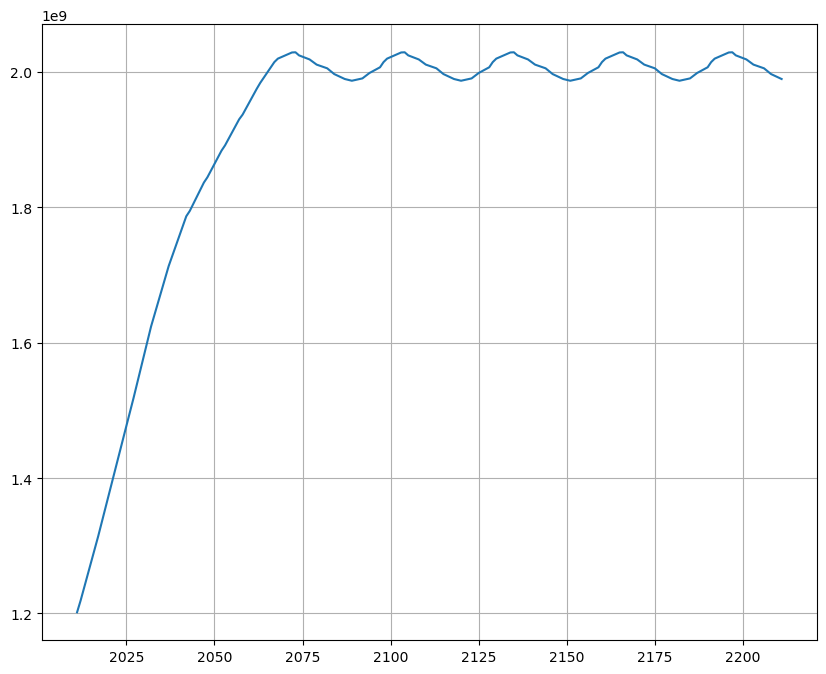

In [36]:
plt.figure(figsize = (10,8))
plt.plot(diff_years_age_dist.sum())
plt.grid()

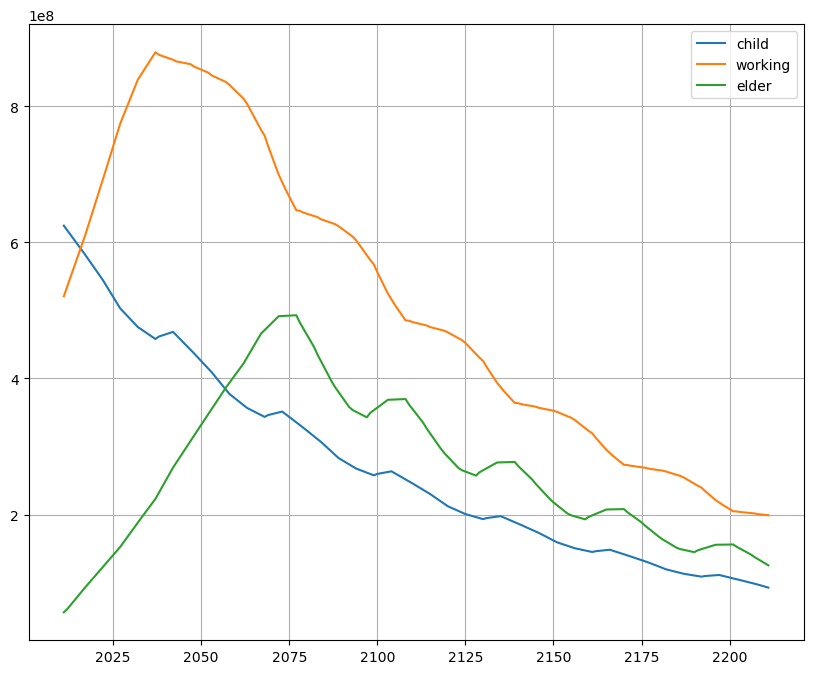

In [23]:
plt.figure(figsize = (10,8))
plt.plot(diff_years_age_dist.iloc[:26].sum(), label = 'child')
plt.plot(diff_years_age_dist.iloc[26:66].sum(), label = 'working')
plt.plot(diff_years_age_dist.iloc[66:].sum(), label = 'elder')
plt.legend()
plt.grid()
plt.show()

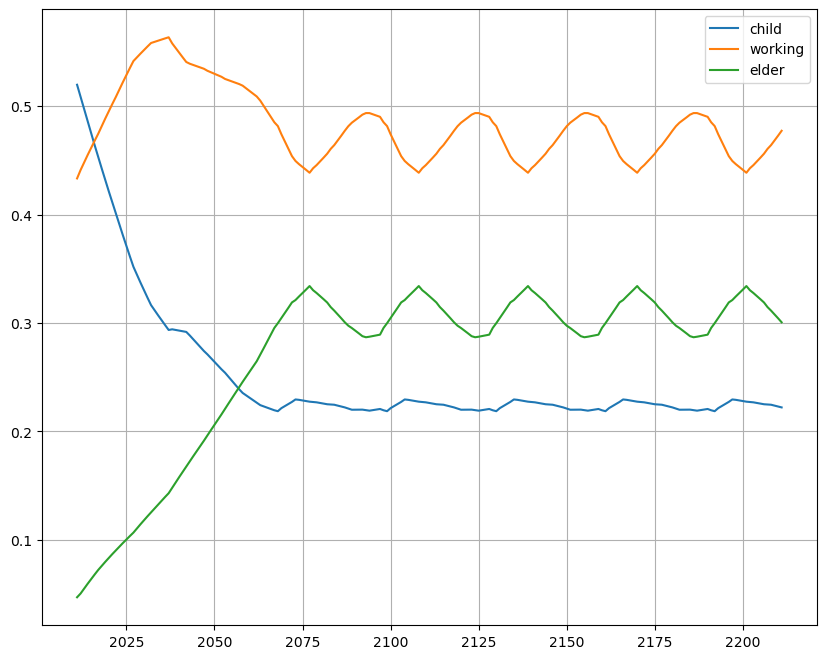

In [24]:
plt.figure(figsize = (10,8))
plt.plot(diff_years_age_dist.iloc[:26].sum()/diff_years_age_dist.sum(), label = 'child')
plt.plot(diff_years_age_dist.iloc[26:66].sum()/diff_years_age_dist.sum(), label = 'working')
plt.plot(diff_years_age_dist.iloc[66:].sum()/diff_years_age_dist.sum(), label = 'elder')
plt.legend()
plt.grid()
plt.show()

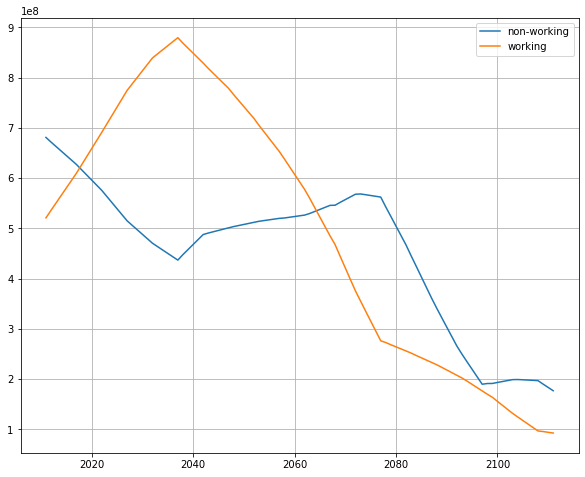

In [261]:
plt.figure(figsize = (10,8))
plt.plot(diff_years_age_dist.iloc[:26].sum() + diff_years_age_dist.iloc[66:].sum(), label = 'non-working')
plt.plot(diff_years_age_dist.iloc[26:66].sum(), label = 'working')
plt.legend()
plt.grid()
plt.show()

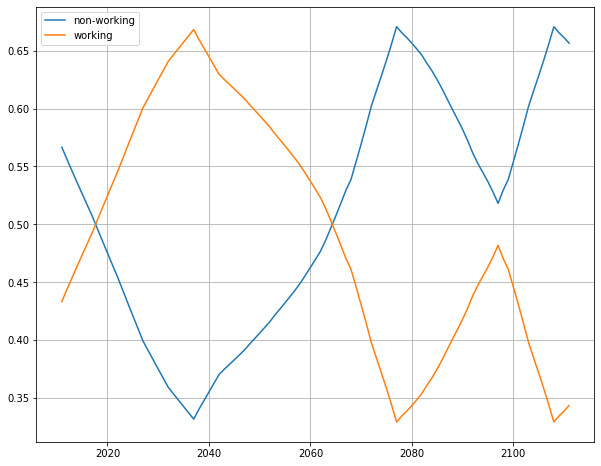

In [262]:
plt.figure(figsize = (10,8))
plt.plot((diff_years_age_dist.iloc[:26].sum() + diff_years_age_dist.iloc[66:].sum())/diff_years_age_dist.sum(), label = 'non-working')
plt.plot(diff_years_age_dist.iloc[26:66].sum()/diff_years_age_dist.sum(), label = 'working')
plt.legend()
plt.grid()
plt.show()

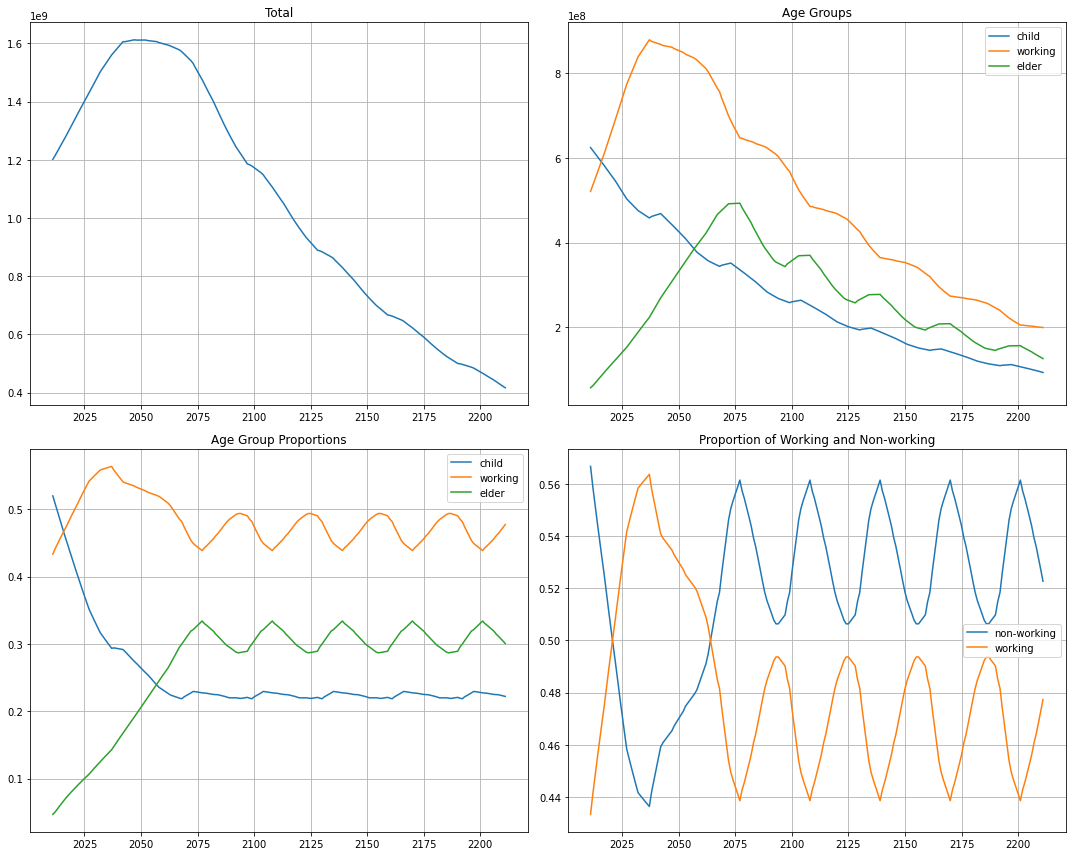

In [251]:
import matplotlib.pyplot as plt

# Your data and calculations (replace with your actual data)
# diff_years_age_dist and other variables used in plots

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1
axs[0, 0].plot(diff_years_age_dist.sum())
axs[0, 0].grid()
axs[0, 0].set_title('Total')

# Plot 2
axs[0, 1].plot(diff_years_age_dist.iloc[:26].sum(), label='child')
axs[0, 1].plot(diff_years_age_dist.iloc[26:66].sum(), label='working')
axs[0, 1].plot(diff_years_age_dist.iloc[66:].sum(), label='elder')
axs[0, 1].legend()
axs[0, 1].grid()
axs[0, 1].set_title('Age Groups')

# Plot 3
axs[1, 0].plot(diff_years_age_dist.iloc[:26].sum() / diff_years_age_dist.sum(), label='child')
axs[1, 0].plot(diff_years_age_dist.iloc[26:66].sum() / diff_years_age_dist.sum(), label='working')
axs[1, 0].plot(diff_years_age_dist.iloc[66:].sum() / diff_years_age_dist.sum(), label='elder')
axs[1, 0].legend()
axs[1, 0].grid()
axs[1, 0].set_title('Age Group Proportions')

# Plot 4
axs[1, 1].plot((diff_years_age_dist.iloc[:26].sum() + diff_years_age_dist.iloc[66:].sum()) / diff_years_age_dist.sum(),
               label='non-working')
axs[1, 1].plot(diff_years_age_dist.iloc[26:66].sum() / diff_years_age_dist.sum(), label='working')
axs[1, 1].legend()
axs[1, 1].grid()
axs[1, 1].set_title('Proportion of Working and Non-working')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()
